In [1]:
from MCSAlign import MCSAlign, np_to_xyz, set_global_smiles, set_global_mols
import py3Dmol
import numpy as np
from rdkit import Chem

N_GEN = 20
TANIMOTO_CUTOFF = 0.01

global_smiles = set_global_smiles(5,7)
global_mols = set_global_mols(global_smiles)

def generate(mcsa, name):
    mcsa.find_interaction_mol()
    mcsa.set_smiles(global_smiles)
    mcsa.set_mols(global_mols)
    mcsa.set_similarities()
    mcsa.find_matches(TANIMOTO_CUTOFF, n_values=N_GEN)
    mcsa.find_MCSs()
    print("generating structures")
    for index in range(N_GEN):
        m1 = mcsa.all_mcs_structures[index]
        atoms, names = (mcsa.rotate_align(index, mcsa.motif))

        str_out = np_to_xyz(atoms, names)

        with open(f"gens_{name}/gen{index}.xyz", "w") as f:
            f.write(str_out)


In [3]:
#  Training
#mcsa = MCSAlign("/data/unibas/boittier/hydra/train/132-64-9.out", "cOc")
#mcsa = MCSAlign("/data/unibas/boittier/hydra/train/2406-25-9.out", "N-O")
#mcsa = MCSAlign("/data/unibas/boittier/hydra/train/327-54-8.out", "cF")
mcsa = MCSAlign("/data/unibas/boittier/hydra/train/98-85-1.out", "CO")
#mcsa = MCSAlign("/data/unibas/boittier/hydra/train/98-86-2.out", "C=O")
#mcsa = MCSAlign("/data/unibas/boittier/hydra/train/611-20-1.out", "C#N")
#mcsa = MCSAlign("/data/unibas/boittier/hydra/train/62-53-3.out", "cN")
#mcsa = MCSAlign("/data/unibas/boittier/hydra/train/67-64-1.out", "C=O")
#mcsa = MCSAlign("/data/unibas/boittier/hydra/train/1191-95-3.out", "C=O")
#mcsa = MCSAlign(" /data/unibas/boittier/hydra/train/98-85-1.out", "C=O")

# 288 is not working
#mcsa = MCSAlign("/data/unibas/boittier/hydra/train/288-32-4.out", "")

# Testing
# mcsa = MCSAlign("/data/unibas/boittier/hydra/test/109-99-9.out", "cOc")
# mcsa = MCSAlign("/data/unibas/boittier/hydra/test/110-86-1.out", "cNc")
# mcsa = MCSAlign("/data/unibas/boittier/hydra/test/125132-75-4.out", "OCCO")
# mcsa = MCSAlign("/data/unibas/boittier/hydra/test/434-45-7.out", "cC=O")
# mcsa = MCSAlign("/data/unibas/boittier/hydra/test/50-0-0.out", "C=O")
# mcsa = MCSAlign("/data/unibas/boittier/hydra/test/502-49-8.out", "C=O")
# mcsa = MCSAlign("/data/unibas/boittier/hydra/test/547-64-8.out", "O=CCO")
# mcsa = MCSAlign("/data/unibas/boittier/hydra/test/75-89-8.out", "CO")
# mcsa = MCSAlign("/data/unibas/boittier/hydra/test/80-73-9.out", "N(C=O)N")


# # Contains Sulphur
# mcsa = MCSAlign("/data/unibas/boittier/hydra/test/110-01-0.out", "S")

mcsa = MCSAlign("/data/unibas/boittier/hydra/train/288-32-4.out", "CO", using_pdb=True)
#mcsa = MCSAlign("/data/unibas/boittier/hydra/test/125132-75-4.out", "OC")
mcsa

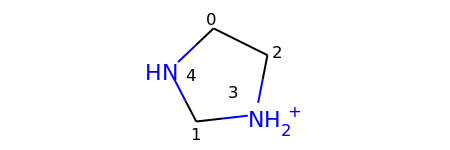

In [60]:
target_complex_mol = Chem.MolFromPDBFile("/data/unibas/boittier/hydra/train/288-32-4.out.molecule.mol2.pdb")

print(target_complex_mol)
target_complex_mol

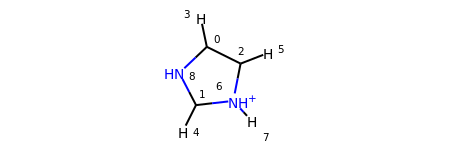

In [4]:
mcsa.target_molHs

In [14]:
name = "98-85"
mcsa = MCSAlign("/data/unibas/boittier/hydra/train/98-85-1.out", "CO")
generate(mcsa, name)


generating structures


In [39]:
name = "110"
print(name)
mcsa = MCSAlign("/data/unibas/boittier/hydra/test/110-86-1.out", "na")
generate(mcsa, name)

110
generating structures


In [48]:
name = "125132"
print(name)
mcsa = MCSAlign("/data/unibas/boittier/hydra/test/125132-75-4.out", "OC")
generate(mcsa, name)

125132
generating structures


In [12]:
name = "288"
print(name)
mcsa = MCSAlign("/data/unibas/boittier/hydra/train/288-32-4.out", "NC", using_pdb=True)
generate(mcsa, name)



288
['    0.6630    1.1540    0.0070 C   0  0  0  0  0  0  0  0  0  0  0  0', '    0.2710   -0.9570    0.0360 C   0  0  0  0  0  0  0  0  0  0  0  0', '    1.8860    0.5460   -0.0280 C   0  0  0  0  0  0  0  0  0  0  0  0', '    0.4420    2.2070    0.0030 H   0  0  0  0  0  0  0  0  0  0  0  0', '   -0.2130   -1.9180    0.0550 H   0  0  0  0  0  0  0  0  0  0  0  0', '    2.8870    0.9350   -0.0640 H   0  0  0  0  0  0  0  0  0  0  0  0', '    1.6210   -0.8050   -0.0090 N   0  0  0  0  0  0  0  0  0  0  0  0', '    2.3010   -1.5440   -0.0280 H   0  0  0  0  0  0  0  0  0  0  0  0', '   -0.3340    0.2070    0.0470 N   0  0  0  0  0  0  0  0  0  0  0  0', '   -3.1900   -0.0510   -0.1190 O   0  0  0  0  0  0  0  0  0  0  0  0', '   -3.5910    0.3040    0.6780 H   0  0  0  0  0  0  0  0  0  0  0  0', '   -2.2360    0.1500   -0.0390 H   0  0  0  0  0  0  0  0  0  0  0  0', '  1  3  1  0', '  1  4  1  0', '  1  9  1  0', '  2  7  1  0', '  2  9  1  0', '  2  5  1  0', '  3  6  1  0', '  3  7

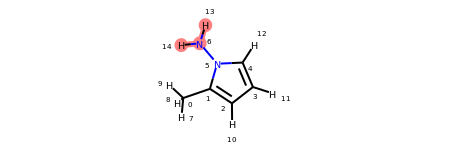

In [34]:
mcsa.all_mcs_structures[0]

In [ ]:
name = "110"
print(name)
mcsa = MCSAlign("/data/unibas/boittier/hydra/test/110-86-1.out", "N")
generate(mcsa, name)

In [6]:
print(np.max(mcsa.similarities))


0.22023809523809523


In [10]:
mcsa.find_matches(0.2, n_values=20)
print(len(mcsa.matches))
mcsa.find_MCSs()

20


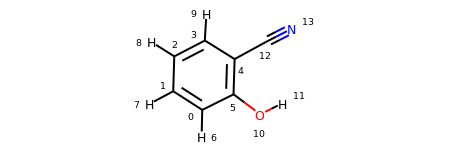

In [11]:
mcsa.target_molHs

In [11]:
index = 9
m1 = mcsa.all_mcs_structures[index]
atoms, names = (mcsa.rotate_align(index, mcsa.motif))



In [12]:
print()

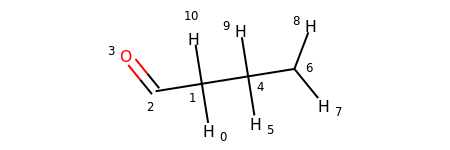

In [13]:
mcsa.all_mcs_mols[index]

In [14]:
xyz_1_str = open("test1.xyz").read()
#xyz_2_str = open("/data/unibas/boittier/hydra/train/62-53-3.out.complex.mol2").read()
xyz_3_str = open("test3.xyz").read()

xyzview = py3Dmol.view(width=400,height=400)
#xyzview.addModel(xyz_1_str, "xyz")
#xyzview.addModel(xyz_2_str, "mol2")
xyzview.addModel(xyz_3_str, "xyz")
xyzview.setStyle({'stick':{}})
xyzview.show()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol